In [2]:
import requests
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [3]:
data = "resources/NYPD_Arrest_Data__Year_to_Date_.csv"
nypd_data = pd.read_csv(data)
nypd_data.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,0,18-24,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007)
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)


In [14]:
nypd_data[['Month','Day',"Year",]] = nypd_data["ARREST_DATE"].str.split("/",expand=True) 
nypd_data.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Month,Day,Year
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,...,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007),06,18,2020
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,...,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004),03,04,2020


In [15]:
clean_nypd_data = nypd_data[['Month','Day','Year','OFNS_DESC',"PERP_SEX"]]
clean_nypd_data.head(2)

,Month,Day,Year,OFNS_DESC,PERP_SEX
0,06,18,2020,FELONY ASSAULT,F
1,03,04,2020,OTHER TRAFFIC INFRACTION,M


In [16]:
month_nypd_data = clean_nypd_data.loc[(clean_nypd_data["Month"] == "03"),:]
month_nypd_data.head(2)

,Month,Day,Year,OFNS_DESC,PERP_SEX
1,03,04,2020,OTHER TRAFFIC INFRACTION,M
7,03,10,2020,PETIT LARCENY,M


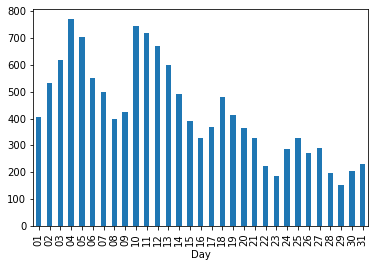

In [41]:
group_ofns = month_nypd_data.groupby("Day")
count_ofns = group_ofns["OFNS_DESC"].count()

count_ofns.plot(kind="bar")

